In [124]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import scipy

In [125]:
path = os.getcwd()
files = os.listdir(path)
filesxlsx = [f for f in files if f[-4:] == 'xlsx']
filesxlsx

['Rabi2-18-2025-14-35.xlsx',
 'Rabi2-18-2025-14-33.xlsx',
 'Rabi2-18-2025-14-38.xlsx',
 'Rabi2-18-2025-14-34.xlsx',
 'Rabi2-18-2025-14-41.xlsx',
 'Rabi2-18-2025-14-39.xlsx',
 'Rabi2-18-2025-14-40.xlsx',
 'Rabi2-18-2025-14-36.xlsx',
 'Rabi2-18-2025-14-37.xlsx',
 'Rabi2-18-2025-14-42.xlsx']

In [126]:
prelimdf = pd.read_excel(filesxlsx[0], sheet_name=None)
xrange = len(prelimdf['data'].x)
ydata = np.zeros((xrange,10))

In [127]:
filenum = -1
for filepath in filesxlsx:
    filenum += 1
    df = pd.read_excel(filepath, sheet_name=None)
    for i, elem in enumerate(df['data'].y):
        ydata[i][filenum] = elem
        
ydata_ave = [np.average(measurements) for measurements in ydata]
ydata_std = [np.std(measurements) for measurements in ydata]
x_data = df['data'].x

<ErrorbarContainer object of 3 artists>

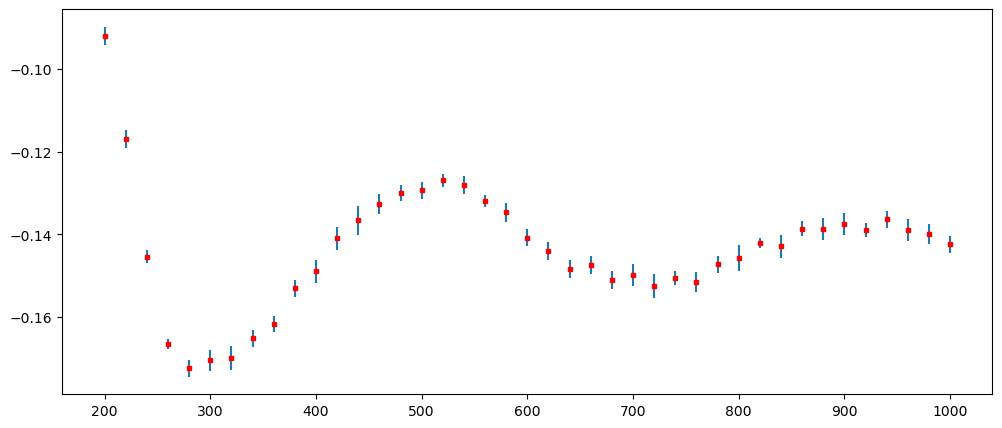

In [128]:
plt.figure(figsize=(12,5))

plt.errorbar(x_data, ydata_ave, ydata_std, marker='s', mfc='red',
         mec='red', ls="None", ms=3)

In [196]:
def fit(t, t_0, A, B, C, D, p, q, beta, O, Zero):
    t = t + t_0
    return A*np.exp(-p*t)+np.exp(-q*t)*(B*np.cos(O*t) + C*np.exp(-beta*t)*np.sin(O*t) + D) + Zero
vectorfit = np.vectorize(fit)

def testfit(t, t_0, gamma, A, B, C, Omega):
    t = t - t_0
    return np.exp(-gamma*t)*(A*np.cos(Omega*t)+B*np.sin(Omega*t))+C
vectortestfit = np.vectorize(fit)

In [197]:
parameters, covariance = scipy.optimize.curve_fit(testfit, x_data, ydata_ave, p0 = [200, 0.1, 0.1, 0.001, -0.142, 0.01])
parameters

array([ 1.90508396e+02,  5.52542779e-03,  5.32830797e-02, -4.81755993e-02,
       -1.41437406e-01,  1.71019313e-02])

In [198]:
t_0, gamma, A, B, C, Omega = parameters
x_fit = np.arange(np.array(x_data)[0],np.array(x_data)[-1],0.1)
y_fit = testfit(x_fit, t_0, gamma, A, B, C, Omega)

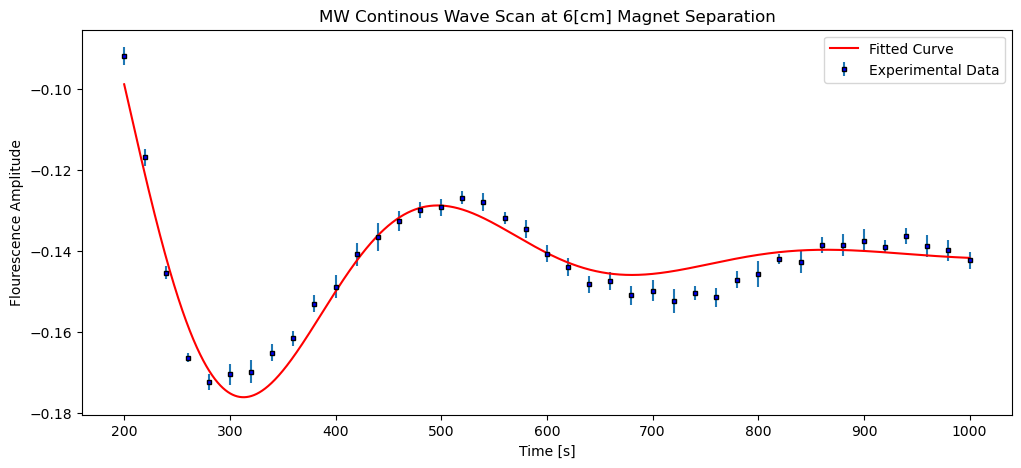

In [199]:
plt.figure(figsize=(12,5))

plt.errorbar(x_data, ydata_ave, ydata_std, marker='s', mfc='blue',
         mec='black', ls="None", ms=3, label = 'Experimental Data')
plt.plot(x_fit, y_fit, 'red', label = 'Fitted Curve')
plt.xlabel("Time [s]")
plt.ylabel("Flourescence Amplitude")
plt.title("MW Continous Wave Scan at 6[cm] Magnet Separation")
plt.legend()

Looking into DFT to get a better estimate of the frequencies.

In [200]:
signal = y_fit[:6]
    
fourier = np.fft.fft(signal)
n = signal.size
timestep = x_data[1]-x_data[0]
freq = np.fft.fftfreq(n, d=timestep)
freq

array([ 0.        ,  0.00833333,  0.01666667, -0.025     , -0.01666667,
       -0.00833333])